In [2]:
# Exercise 0 -> print quantum computers / jobs pending / qubits available
from dotenv import load_dotenv
import os
from qiskit_ibm_provider import IBMProvider


load_dotenv()
key = os.getenv("IMBQ_KEY")
provider = IBMProvider()

quantum_computers = provider.backends(simulator=True)
print('Simulated quantum computers:')
for qc in quantum_computers:
    if qc.status().operational:
        queues = qc.status().pending_jobs
        print(f'\t{qc.name} has {queues} queues')
        
quantum_computers = provider.backends(simulator=False)
print('Real quantum computers:')
for qc in quantum_computers:
    if qc.status().operational:
        queues = qc.status().pending_jobs
        print(f'\t{qc.name} has {queues} queues with {qc.num_qubits} qubits')

Simulated quantum computers:
	simulator_mps has 0 queues
	simulator_statevector has 0 queues
	simulator_stabilizer has 0 queues
	ibmq_qasm_simulator has 0 queues
	simulator_extended_stabilizer has 0 queues
Real quantum computers:
	ibm_brisbane has 1162 queues with 127 qubits
	ibm_kyoto has 6 queues with 127 qubits
	ibm_osaka has 3 queues with 127 qubits


        ┌───┐ ░ ┌─┐
     q: ┤ H ├─░─┤M├
        └───┘ ░ └╥┘
meas: 1/═════════╩═
                 0 
{'1': 0.492, '0': 0.508}


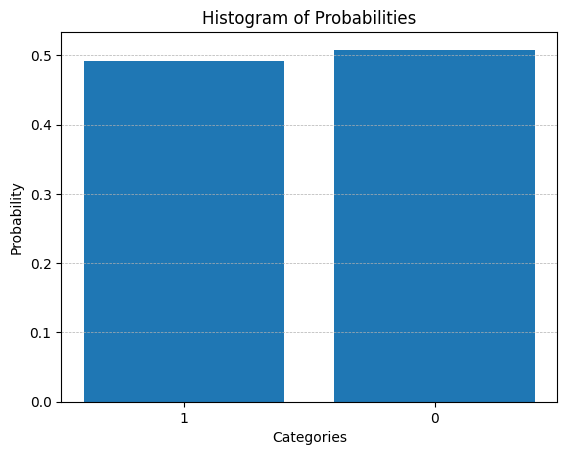

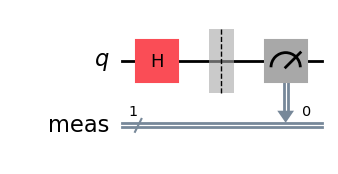

In [3]:
# Exercise 1 -> Launch, on a AerSimulator (local), a quantum circuit with 1 qubit, the Hadamard gate and 500 shots 
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt

# Create the quantum circuit with 1 qubit
qc = QuantumCircuit(1)
# apply the Hadamard gate to the fist qubit
qc.h(0)
# launch the measure on each qubit
qc.measure_all()

print(qc.draw())

# Create  a Aer simulator (launched in local) 
simulator = AerSimulator()
# Launch the circuit onto the simulator with 500 shots
result = simulator.run(qc, shots=500).result()
data = result.get_counts(0)

total = sum(data.values())
#Clean data to have proportion of states |0⟩ and |1⟩  
data = {key: value/total for key, value in data.items()}

print(data)

plt.bar(data.keys(), data.values(), align='center')

plt.xlabel('Categories')
plt.ylabel('Probability')
plt.title('Histogram of Probabilities')
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.5)
plt.show()

qc.draw('mpl')

        ┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1 
{'00': 0.494, '11': 0.506}


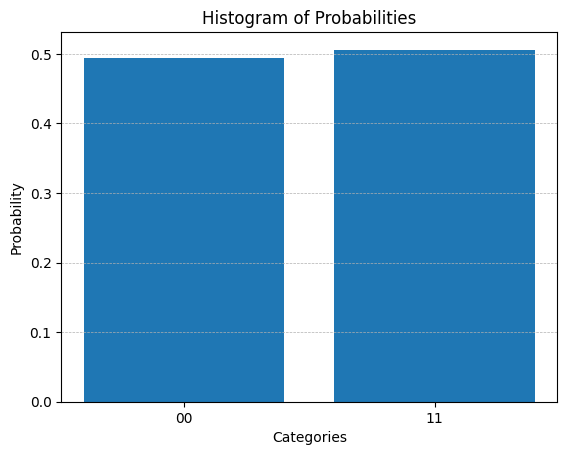

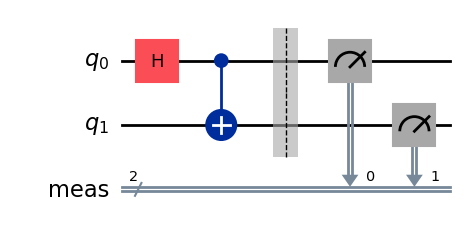

In [4]:
#Exercise 2 -> Launch, on a AerSimulator (local), a quantum circuit with 2 qubits, the Hadamard gate on the first one / the controlled-X gate (0, 1)  and 500 shots 
qc = QuantumCircuit(2)

qc.h(0)
#Apply the controlled-X to 'link' the second qubit to the state of the first
qc.cx(0, 1)
qc.measure_all()

print(qc.draw())

simulator = AerSimulator()
result = simulator.run(qc, shots=500).result()
data = result.get_counts(0)

total = sum(data.values())
data = {key: value/total for key, value in data.items()}

print(data)

plt.bar(data.keys(), data.values(), align='center')

plt.xlabel('Categories')
plt.ylabel('Probability')
plt.title('Histogram of Probabilities')
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.5)
plt.show()

qc.draw('mpl')

        ┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1 
{'00': 0.48, '01': 0.012, '11': 0.474, '10': 0.034}


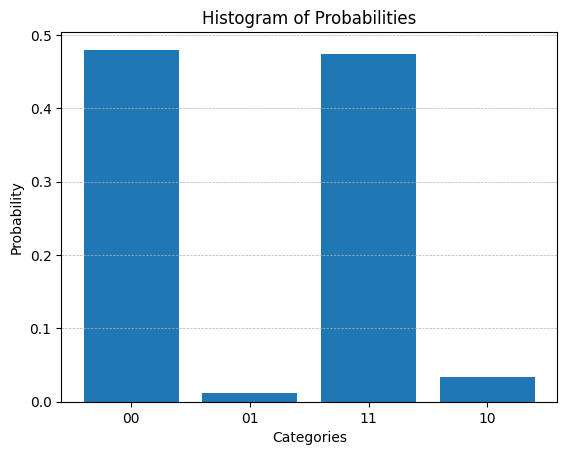

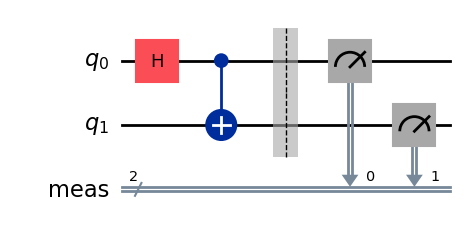

In [5]:
#Exercise 3.0 -> Call the circuit from the previous exercise into a real quantum computer
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService

qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0, 1)
qc.measure_all()

print(qc.draw())

service = QiskitRuntimeService(channel="ibm_quantum", token=key)
#Select a real quantum computer (we want a computer with the fewest processes in progress)
quantum_computer = service.least_busy(simulator=False, operational=True)
#Optimise circuit to be run on quantum computer
pm = generate_preset_pass_manager(backend=quantum_computer, optimization_level=0)
optimised_circuit = pm.run(qc)
#Launch the job
result = quantum_computer.run(optimised_circuit, shots=500).result()
data = result.get_counts(0)

total = sum(data.values())
data = {key: value/total for key, value in data.items()}

print(data)

plt.bar(data.keys(), data.values(), align='center')

plt.xlabel('Categories')
plt.ylabel('Probability')
plt.title('Histogram of Probabilities')
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.5)
plt.show()

qc.draw('mpl')

In [6]:
#Exercise 3.1 -> Call the circuit from the previous exercise into a simulated quantum computer
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService

qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0, 1)
qc.measure_all()

print(qc.draw())

service = QiskitRuntimeService(channel="ibm_quantum", token=key)
#Select a simulated quantum computer
quantum_computer = service.least_busy(simulator=True, operational=True)

pm = generate_preset_pass_manager(backend=quantum_computer, optimization_level=0)
optimised_circuit = pm.run(qc)

result = quantum_computer.run(optimised_circuit, shots=500).result()
data = result.get_counts(0)

total = sum(data.values())
data = {key: value/total for key, value in data.items()}

print(data)

plt.bar(data.keys(), data.values(), align='center')

plt.xlabel('Categories')
plt.ylabel('Probability')
plt.title('Histogram of Probabilities')
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.5)
plt.show()

qc.draw('mpl')

        ┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1 


TranspilerError: "The number of qubits for Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]) does not match the number of qubits in the properties dictionary: (0,)"

In [ ]:
 #Exercise 4 -> Deutsch-Jozsa : Create our first quantum algorithm
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService
import numpy as np
from qiskit.visualization import plot_histogram

def select_backend(token, backend='REAL'):
    backend_computer = None
    if backend == 'REAL':
        service = QiskitRuntimeService(channel="ibm_quantum", token=token)
        backend_computer = service.least_busy(simulator=False, operational=True)
    elif backend == 'SIMULATED':
        service = QiskitRuntimeService(channel="ibm_quantum", token=token)
        backend_computer = service.least_busy(simulator=True, operational=True)
    elif backend == 'LOCAL':
        backend_computer = AerSimulator()
    return backend_computer

def optimize_circuit(qc, backend, op_level=0):
    pm = generate_preset_pass_manager(backend=backend, optimization_level=op_level)
    return pm.run(qc)


def balanced(nb_qbit=4): # code from subject creator
    qc = QuantumCircuit(nb_qbit, name='Balanced')
    b = np.random.randint(1,2**nb_qbit-1)
    b_str = format(b, '0'+str(nb_qbit-1)+'b')
    for qubit in range(len(b_str)):
        if b_str[qubit] == '1':
            qc.x(qubit)

    for qubit in range(nb_qbit-1):
        qc.cx(qubit, nb_qbit-1)
    for qubit in range(len(b_str)):
        if b_str[qubit] == '1':
            qc.x(qubit)
    return qc


def constant(nb_qbit=4): # code from subject creator
    qc = QuantumCircuit(nb_qbit, name='Constant')
    if np.random.randint(2) == 1:
        qc.x(nb_qbit-1)
    return qc
    
# Code
nb_qbit = 4
    
oracle1 = balanced(nb_qbit)
oracle2 = constant(nb_qbit)

oracle1.to_gate()
oracle2.to_gate()

print(oracle1.draw())
print(oracle2.draw())


qc = QuantumCircuit(nb_qbit, nb_qbit)

## initiate qubit
qc.x(nb_qbit - 1)
for i in range(0, nb_qbit):
    qc.h(i)    
qc.barrier()

## apply oracle
qc.append(oracle1, range(nb_qbit))
qc.barrier()

## undo Hadamard gate
for i in range(0, nb_qbit - 1):
    qc.h(i)
    
## observe qubits values
for i in range(nb_qbit - 1):
    qc.measure(i, i)



print(qc.draw())

quantum_computer = select_backend(key, backend='LOCAL')

op_circuit = optimize_circuit(qc, quantum_computer)

result = quantum_computer.run(op_circuit, shots=500).result()
data = result.get_counts(op_circuit)

plot_histogram([data])

# qc.draw('mpl')